# <center>AUC</center>

### AUC = Area Under the Curve

### ROC Curve = Receiver Operating Characteristic Curve

## 1. Confusion Matrix

![confusion-matrix](./pics/aucroc/confusion-matrix.png)

![confusion-matrix-example](./pics/aucroc/confusion-matrix-example.png)

### Recall (召回率, 真阳性率)

Out of all actual positive classes, how much a model can predict correctly. It should be high as possible.

对所有真实的正例，模型能够预测对多少比例(能"召回"多少比例).

$Recall = Sensitivity = TPR = \frac {TP} {TP + FN}$

### False Positive Rate (假阳性率)

$FPR = \frac {FP} {FP + TN}$

### Precision (精确率)

Out of all the positive classes a mode have predicted, how many are actually positive.

所有被模型预测为正例的，有多少比例是真正的正例

$Precision = \frac {TP} {TP + FP}$

### Accuracy (准确率)

Out of all cases, how many a model can predict correctly.

所有被模型预测正确的正例和负例的总比例

$Accuracy = \frac {TP + TN} {TP + TN + FP + FN}$

### F1 measure ( F1 score)

$F = \frac {2 \cdot Recall \cdot Precision} {Recall + Precision}$

### F measure (F score)

$F_\beta = (1 + \beta^2) \cdot \frac {Recall \cdot Precision} {\beta^2 \cdot Precision + Recall}$

* when $\beta = 1$, F = F1
* when $\beta > 1$, F -> Recall
* when $\beta < 1$, F -> Precision

<hr/>

![confusion-matrix-table](./pics/aucroc/confusion-matrix-table.png)

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 2   | FP = 1   |
| Predict 0 | FN = 2   | TN = 2   |


![confusion-matrix](./pics/aucroc/confusion-matrix.png)

$Recall = \frac {TP} {TP + FN} = \frac {2} {2 + 2} = \frac 1 2$

$Precision = \frac {TP} {TP + FP} = \frac {2} {2 + 1} = \frac 2 3$

$Accuracy = \frac {TP + TN} {TP + TN + FP + FN} = \frac 4 7$

$F_1 measure = F_1 = \frac {1} {\frac 1 2 * (\frac {1} {Recall} + \frac {1} {Precision} )}= \frac {2 * Recall * Precision} {Recall + Precision} = \frac 4 7$

### 算数平均 (arithmetic mean) v.s. 调和平均 (harmonic mean )

$F_1 score$ 是Recall和Precision的调和平均数

In [60]:
(1/2, 2/3, 4/7)

(0.5, 0.6666666666666666, 0.5714285714285714)

In [26]:
(1/2 + 2/3) / 2

0.5833333333333333

#### 一个10公里的坡地，上坡用了2小时，下坡用了1小时。

上坡平均速度，下坡平均速度，总平均速度

![confusion-matrix-cal](./pics/aucroc/confusion-matrix-cal.png)

## Quiz

1. 假设有一种疾病，患病的概率是1%
2. 假设随机预测1%的人患病，99%的人不患病
3. 计算Recall, Precision, Accuracy, $F_1$的期望值

<hr/>

### 例子1 预测一种危险的流行病

* 正例，阳性，染病
* 负例，阴性，没病

Type1 Error, False Positive, 没有染病的人被诊断为染病了。不好，但是可以接受。虚惊一场，进一步检查，最后没事儿回家。

**Type2 Error**, False Negative, 染病的人被诊断为没有染病。**不可接受，**导致疾病进一步传播，爆发。

### 例子2 IPhone面部识别解锁

* 正例，面容识别通过，解锁
* 负例，面容识别失败，不解锁

**Type1 Error**, False Positive, 客人的面容识别通过，不该解锁的解锁了。**不可以接受。**

Type2 Error, False Negative, 主人的面容识别失败，该解锁的没解锁。不好，但是可以接受

### 例子3 Marketing预测是否为潜在客户

* 正例，预测是潜在客户，投放广告
* 负例，预测不是潜在客户，不投放广告

Type1 Error, False Positive, 不是潜在客户被预测为潜在客户，投放了广告。不好，但是可以接受。

**Type2 Error**, False Negative, 是潜在的客户被预测为不是，不投放广告。**不可以接受。**

## 2. ROC (receiver operating characteristic curve)

![roc](./pics/aucroc/roc.png)

### A perfect classifier

In [50]:
import numpy as np
import matplotlib.pyplot as plt

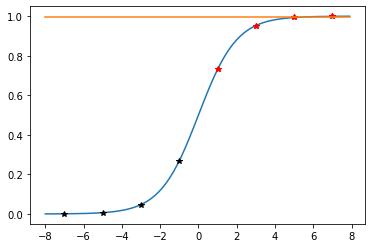

In [45]:
X = np.arange(-8, 8, 0.1)

Y = 1 / (1 + np.exp(-X))
plt.plot(X, Y, '-')

X0 = np.array([-7, -5, -3, -1])
Y0 = 1 / (1 + np.exp(-X0))
plt.plot(X0, Y0, '*', color='black')

X1 = np.array([1, 3, 5, 7])
Y1 = 1 / (1 + np.exp(-X1))
plt.plot(X1, Y1, '*', color='red')
plt.plot(X1, Y1, '*', color='red')

line = 0.998 + 0 * X
plt.plot(X, line, '-')


plt.show()

#### X axis
$FPR = \frac {FP} {FP + TN}$

#### Y axis
$TPR = Recall = Sensitivity = \frac {TP} {TP + FN}$



#### when y = 1.0

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 0   | FP = 0   |
| Predict 0 | FN = 4   | TN = 4   |

(FPR, TPR) = (0, 0)

#### when y = 0.998

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 1   | FP = 0   |
| Predict 0 | FN = 3   | TN = 4   |

(FPR, TPR) = (0, 0.25)

#### when y = 0.98

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 2   | FP = 0   |
| Predict 0 | FN = 2   | TN = 4   |

(FPR, TPR) = (0, 0.5)

#### when y = 0.8

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 3   | FP = 0   |
| Predict 0 | FN = 1   | TN = 4   |

(FPR, TPR) = (0, 0.75)

#### when y = 0.5

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 0   |
| Predict 0 | FN = 0   | TN = 4   |

(FPR, TPR) = (0, 1)

#### when y = 0.2

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 1   |
| Predict 0 | FN = 0   | TN = 3   |

(FPR, TPR) = (0.25, 1)

#### when y = 0.02

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 2   |
| Predict 0 | FN = 0   | TN = 2   |

(FPR, TPR) = (0.5, 1)

#### when y = 0.002

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 3   |
| Predict 0 | FN = 0   | TN = 1   |

(FPR, TPR) = (0.75, 1)

#### when y = 0.0

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 4   |
| Predict 0 | FN = 0   | TN = 0   |

(FPR, TPR) = (1, 1)

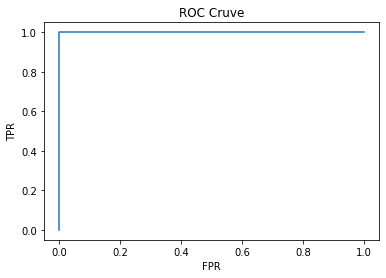

In [55]:
FPR = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 1.0])
TPR = np.array([0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0])


plt.plot(FPR, TPR, '-')

plt.title('ROC Cruve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#### AUC = 1.0

### Another classifier which makes mistakes

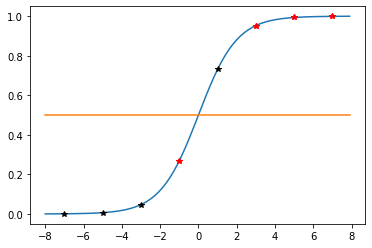

In [59]:
X = np.arange(-8, 8, 0.1)

Y = 1 / (1 + np.exp(-X))
plt.plot(X, Y, '-')

X0 = np.array([-7, -5, -3, 1])
Y0 = 1 / (1 + np.exp(-X0))
plt.plot(X0, Y0, '*', color='black')

X1 = np.array([-1, 3, 5, 7])
Y1 = 1 / (1 + np.exp(-X1))
plt.plot(X1, Y1, '*', color='red')
plt.plot(X1, Y1, '*', color='red')

line = 0.5 + 0 * X
plt.plot(X, line, '-')


plt.show()



#### when y = 1.0

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 0   | FP = 0   |
| Predict 0 | FN = 4   | TN = 4   |

(FPR, TPR) = (0, 0)

#### when y = 0.998

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 1   | FP = 0   |
| Predict 0 | FN = 3   | TN = 4   |

(FPR, TPR) = (0, 0.25)

#### when y = 0.98

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 2   | FP = 0   |
| Predict 0 | FN = 2   | TN = 4   |

(FPR, TPR) = (0, 0.5)

#### when y = 0.8

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 3   | FP = 0   |
| Predict 0 | FN = 1   | TN = 4   |

(FPR, TPR) = (0, 0.75)

#### when y = 0.5

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 3   | FP = 1   |
| Predict 0 | FN = 1   | TN = 3   |

(FPR, TPR) = (0.25, 0.75)

#### when y = 0.2

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 1   |
| Predict 0 | FN = 0   | TN = 3   |

(FPR, TPR) = (0.25, 1)

#### when y = 0.02

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 2   |
| Predict 0 | FN = 0   | TN = 2   |

(FPR, TPR) = (0.5, 1)

#### when y = 0.002

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 3   |
| Predict 0 | FN = 0   | TN = 1   |

(FPR, TPR) = (0.75, 1)

#### when y = 0.0

|           | Actual 1 | Actual 0 |
| -         | -        | -        |
| Predict 1 | TP = 4   | FP = 4   |
| Predict 0 | FN = 0   | TN = 0   |

(FPR, TPR) = (1, 1)

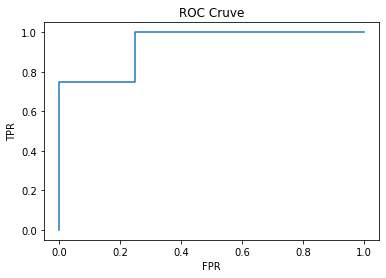

In [58]:
FPR2 = np.array([0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.5, 0.75, 1.0])
TPR2 = np.array([0.0, 0.25, 0.5, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0])


plt.plot(FPR2, TPR2, '-')

plt.title('ROC Cruve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#### AUC = 0.96

<hr/>

![roc1](./pics/aucroc/roc1.png)

![roc2](./pics/aucroc/roc2.png)